<a href="https://colab.research.google.com/github/labeduc/ciencia-de-dados/blob/main/python/LabEduc%20-%20Python%20-%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python **Pandas** - Preparação de Dados de Gente Grande!

Se você chegou até aqui, significa que já deve ter aprendido um pouco de preparação de dados, utilizando as bibliotecas padrão do python. E deve ter percebido que a tarefa não é simples, e requer muitas linhas de código. E ainda por cima, em situações como a do heatmap, somente as bibliotecas padrão não dão conta do recado.

E por esses motivos, a biblioteca **Pandas** foi criada. Com a biblioteca Pandas, todo o trabalho de manipulação dos dados fica simplificado, rápido e mais organizado.

Então, bora aprender como utilizar a biblioteca Pandas?

## Configurando o ambiente

Primeiro, precisamos baixar nosso repositório de datasets.

In [ ]:
!git lfs clone -l -s https://github.com/labeduc/datasets.git

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'datasets'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
Git LFS: (5 of 5 files) 104.20 MB / 104.20 MB


Depois, preenchemos a variável nome do arquivo com o arquivo que iremos trabalhar.

In [ ]:
caminho_do_arquivo = "/content/datasets/pokemons/all.csv"

## Pandas - O básico

### Carregando a biblioteca

Primeira coisa que precisamos saber é como tornar a biblioteca disponível aqui no Google Colab.

In [ ]:
import pandas as pd
import seaborn as sns

### Lendo os dados

Depois, podemos substituir todo aquele código para carregar o arquivo (código abaixo) por apenas 1 linha.

```
import csv                                                       # importa a biblioteca nativa csv

pokemons_long_format = {}                                        # cria a lista de pokemons vazia
with open(caminho_do_arquivo, 'r', encoding='utf-8') as arquivo: # abre o arquivo
  dados = csv.DictReader(arquivo)                                # utiliza a biblioteca csv para ler cada linha do arquivo 
                                                                 # e carrega-la em um dicionário de dados
  for pokemon in dados:                                          # percorre o arquivo linha a linha
    for key in pokemon.keys():                                   # percorre a lista de campos do dicionário que representa a linha
      if key not in pokemons_long_format:                        # verifica se a coluna já existe no nosso novo objeto longo
        pokemons_long_format[key] = []                           # Se não existe, cria a entrada
      valor = None                                               # inicializa uma variável vazia
      try:
        valor = float(pokemon[key])                              # tenta atribuir o valor da coluna a variavel convertendo para número
      except:
        valor = pokemon[key]                                     # em caso de falha, atribui o valor como texto

      pokemons_long_format[key].append(valor)             # adiciona o valor na lista
```

E o mais importante é lembrar que esta versão foi a última. Antes disso, escrevemos outros códigos, e esta versão foi a que tinha vários pontos corrigidos, incluindo o tipo dos dados.


In [ ]:
pokemons_df = pd.read_csv(caminho_do_arquivo)

Agora, temos um panda dataframe, que pode ser utilizado diretamente com o seaborn e matplotlib para plotar o gráfico. Vamos testar?

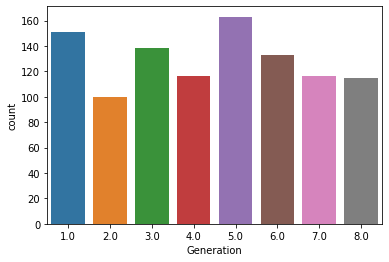

In [ ]:
cx = sns.countplot(x=pokemons_df["Generation"])

Wow, isto é incrível!!! Menos linhas de código, menos erros!!!

### Descobrindo a estrutura do DataFrame

Antes, tinhamos que criar pequenos códigos para ver quais eram as colunas disponíveis. Com Pandas, uma única função nos dá as colunas, seu tipo de dados e quantos valores não nulos elas contém.

In [ ]:
pokemons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

Também podemos rapidamente ter uma idéia de quantas linhas e colunas o nosso DataFrame tem:

In [ ]:
pokemons_df.shape

(1032, 44)

### Conhecendo nossos dados numéricos

Se quisermos ter uma idéia dos valores que estamos tratando, Pandas tem uma função para isso também!

In [ ]:
pokemons_df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


### Inspecionando os dados

E se quisermos dar aquela espiadinha nos dados? Temos alternativas muito simples em Pandas!!!

In [ ]:
pokemons_df.head(5)  # mostrando as 5 linhas iniciais do DataFrame

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [ ]:
pokemons_df.tail(5) # e que tal olhar as linhas do final???

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5
1031,898,Calyrex Shadow Rider,Psychic,Ghost,['As One'],100,85,80,165,100,...,1.0,1.0,4.0,1.0,4.0,1.0,1.0,2.4,53.6,9.3


In [ ]:
pokemons_df.sample(5)   # e se eu quiser algo aleatório???

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
468,390,Chimchar,Fire,NaN,"['Blaze', 'Iron Fist']",44,58,44,58,44,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.5,6.2,24.8
261,214,Heracross,Bug,Fighting,"['Guts', 'Moxie', 'Swarm']",80,125,75,40,95,...,0.50,1.0,1.0,1.0,0.5,1.0,2.0,1.5,54.0,24.0
475,397,Staravia,Normal,Flying,"['Intimidate', 'Reckless']",55,75,50,40,40,...,0.50,2.0,0.0,1.0,1.0,1.0,1.0,0.6,15.5,43.1
524,443,Gible,Dragon,Ground,"['Rough Skin', 'Sand Veil']",58,70,45,40,45,...,1.00,0.5,1.0,2.0,1.0,1.0,2.0,0.7,20.5,41.8
786,680,Doublade,Steel,Ghost,['No Guard'],59,110,150,45,49,...,0.25,0.5,2.0,0.5,2.0,0.5,0.5,0.8,4.5,7.0


In [ ]:
pokemons_df['Type 1'].unique()   # posso ver os valores únicos de qualquer coluna

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
pokemons_df['Type 1'].unique().tolist() # para deixar mais arrumadinho e pronto para copiar e colar em algum documento!

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Dark',
 'Poison',
 'Electric',
 'Ground',
 'Ice',
 'Fairy',
 'Steel',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Dragon',
 'Flying']

In [ ]:
pokemons_df.columns.tolist()  # essa função tolist ajuda também a exportar a lista de colunas. 

['Number',
 'Name',
 'Type 1',
 'Type 2',
 'Abilities',
 'HP',
 'Att',
 'Def',
 'Spa',
 'Spd',
 'Spe',
 'BST',
 'Mean',
 'Standard Deviation',
 'Generation',
 'Experience type',
 'Experience to level 100',
 'Final Evolution',
 'Catch Rate',
 'Legendary',
 'Mega Evolution',
 'Alolan Form',
 'Galarian Form',
 'Against Normal',
 'Against Fire',
 'Against Water',
 'Against Electric',
 'Against Grass',
 'Against Ice',
 'Against Fighting',
 'Against Poison',
 'Against Ground',
 'Against Flying',
 'Against Psychic',
 'Against Bug',
 'Against Rock',
 'Against Ghost',
 'Against Dragon',
 'Against Dark',
 'Against Steel',
 'Against Fairy',
 'Height',
 'Weight',
 'BMI']

E se isso não te deixar feliz, é só escrever um código, sem problema nenhum!!! É bom pra praticar!!!

### Manipulando o DataFrame (Backup, Limpeza, Formatação ...)

Agora, veremos algumas tarefas de manipulação do DataFrame.

In [ ]:
# precisa de um backup dos dados? Só usar a função copy
pokemons_df_copy = pokemons_df.copy()

pokemons_df.shape == pokemons_df_copy.shape

True

In [ ]:
# Quer trabalhar com menos dados??? Selecione apenas as colunas que você quer!!!
pokemons_df_type = pokemons_df[["Type 1", "Att", "Def"]]  

pokemons_df_type.head(5)

,Type 1,Att,Def
0,Grass,49,49
1,Grass,62,63
2,Grass,82,83
3,Grass,100,123
4,Fire,52,43


In [ ]:
# Remover colunas que não te interessam no DataFrame original???
pokemons_df2 = pokemons_df.drop(["Type 2"], axis=1)  

print(pokemons_df.shape)
print(pokemons_df2.shape)

(1032, 44)
(1032, 43)


In [ ]:
# Eliminar toda a linha que tem uma coluna sem valor???
new_df = pokemons_df.dropna()                        

print("DataFrame Atual:", pokemons_df.shape)
print("DataFrame Sem Campos Vazios:", new_df.shape)

DataFrame Atual: (1032, 44)
DataFrame Sem Campos Vazios: (548, 44)


In [ ]:
# Descobrir quais colunas tem itens sem valor???
pokemons_df.isnull().sum(axis=0)

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

In [ ]:
# Descobrir se existem linhas duplicadas?

pokemons_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1027    False
1028    False
1029    False
1030    False
1031    False
Length: 1032, dtype: bool

In [ ]:
# Sumarizando para saber se tem linhas duplicadas e quantas são:
pokemons_df.duplicated(subset=None, keep=False).value_counts()

# Se retornou apenas a linha False, significa que não temos duplicações

False    1032
dtype: int64

A próxima função merece algum destaque: é a função **apply** - ela permite que executemos uma função para cada célula do nosso DataFrame. 

In [ ]:
# Aqui iremos utilizar para tornar converter todos os caracteres de campos string para caracteres minúsculos
pokemons_lower = pokemons_df.apply(lambda x: x.astype(str).str.lower())

pokemons_lower.head(5)

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,bulbasaur,grass,poison,"['chlorophyll', 'overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,ivysaur,grass,poison,"['chlorophyll', 'overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,venusaur,grass,poison,"['chlorophyll', 'overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,mega venusaur,grass,poison,['thick fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,charmander,fire,nan,"['blaze', 'solar power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [ ]:
# Já aqui iremos atribuir uma descrição a um campo numérico
# O campo Legendary indica se o pokemon é lendário ou não. O valor 0.0 denota 
# um pokemon comum e 1.0 denota um lendário
# Mas em um gráfico, seria bem melhor ter uma descrição textual, fica mais nítido

pokemons_lendarios = pokemons_lower.apply(lambda x: 'Não' if x["Legendary"] == '0.0' else 'Sim', axis=1)

pokemons_lower["Legendary Desc"] = pokemons_lendarios


pokemons_lower[["Legendary", "Legendary Desc"]]

,Legendary,Legendary Desc
0,0.0,Não
1,0.0,Não
2,0.0,Não
3,0.0,Não
4,0.0,Não
...,...,...
1027,1.0,Sim
1028,1.0,Sim
1029,1.0,Sim
1030,1.0,Sim


#### Agrupando dados

Esta é outra necessidade para plotar alguns gráficos. Anteriormente, nós escrevemos código para fazer isso (veja abaixo). Agora, novamente, Pandas vem nos salvar com apenas uma linha!!!


```
pokemons_type_agg = {}                                        # inicializamos a estrutura de agregação
pokemons_type_final = {"Type 1": [], "Value": []}             # inicializamos nosso dataframe
for type in pokemons_long_format["Type 1"]:                   # percorremos todo o nosso dataframe original
  if type not in pokemons_type_agg:                           # se a chave não existe no dataframe
    pokemons_type_agg[type] = 0                               # cria a chave no dataframe iniciando com 0
  pokemons_type_agg[type] += 1                                # registra uma ocorrência da chave

for key in pokemons_type_agg:                                 # percorremos o agregado
  pokemons_type_final["Type 1"].append(key)                   # preenchemos o dataframe
  pokemons_type_final["Value"].append(pokemons_type_agg[key]) # com os dados do agregado
```

E esse código faz agrupamento por apenas 1 campo! Conforme precisamos de agrupamentos mais complexos, este código ficaria mais complexo. 

Mas em Pandas...

In [ ]:
# Aqui, podemos dizer por quais campos queremos fazer o agrupamento.
# Para apenas uma agregação, podemos aplicar direto a função, como a count()
pokemons_type_agg_df = pokemons_df.groupby(["Type 1"]).count()

# Próxima etapa, é resetar os indices do DataFrame, para ajustar seu formato
pokemons_type_agg_df = pokemons_type_agg_df.reset_index()

# Por último, podemos selecionar a coluna de agrupamento e uma coluna com o valor da agregação
pokemons_type_agg_df[["Type 1", "Number"]]

,Type 1,Number
0,Bug,81
1,Dark,46
2,Dragon,42
3,Electric,59
4,Fairy,22
5,Fighting,42
6,Fire,64
7,Flying,8
8,Ghost,41
9,Grass,91


#### Filtrando os dados

Filtrar dados é uma funcionalidade tão básica quanto agregação. Seguem alguns exemplos

In [ ]:
# Filtrando por uma coluna

pokemons_water_df = pokemons_df[pokemons_df["Type 1"] == "Water"]

pokemons_water_df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
9,7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0
10,8,Wartortle,Water,NaN,"['Rain Dish', 'Torrent']",59,63,80,65,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,22.5,22.5
11,9,Blastoise,Water,NaN,"['Rain Dish', 'Torrent']",79,83,100,85,105,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.6,85.5,33.4
12,9,Mega Blastoise,Water,NaN,['Mega Launcher'],79,103,120,135,115,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.6,101.1,39.5
71,54,Psyduck,Water,NaN,"['Cloud Nine', 'Damp', 'Swift Swim']",50,52,48,65,50,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.8,19.6,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,834,Drednaw,Water,Rock,"['Shell Armor', 'Strong Jaw', 'Swift Swim']",90,115,90,48,68,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,115.5,115.5
973,846,Arrokuda,Water,NaN,"['Propeller Tail', 'Swift Swim']",41,63,40,40,30,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,4.0
974,847,Barraskewda,Water,NaN,"['Propeller Tail', 'Swift Swim']",61,123,60,60,50,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.3,30.0,17.8
1010,882,Dracovish,Water,Dragon,"['Sand Rush', 'Strong Jaw', 'Water Absorb']",90,90,100,70,80,...,1.0,1.0,1.0,2.0,1.0,0.5,2.0,2.3,215.0,40.6


In [ ]:
# Filtrando por mais de uma coluna
pokemons_water_legendary_df = pokemons_df[(pokemons_df["Type 1"] == "Water") &  (pokemons_df["Legendary"] == 1)]

pokemons_water_legendary_df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
295,245,Suicune,Water,NaN,"['Inner Focus', 'Pressure']",100,75,115,90,115,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,2.0,187.0,46.8
454,382,Kyogre,Water,NaN,['Drizzle'],100,100,90,150,140,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,4.5,352.0,17.4
455,382,Primal Kyogre,Water,NaN,['Primordial Sea'],100,150,90,180,160,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,9.8,430.0,4.5
574,484,Palkia,Water,Dragon,"['Pressure', 'Telepathy']",90,120,100,150,120,...,1.0,1.0,1.0,2.0,1.0,0.5,2.0,4.2,336.0,19.0
580,489,Phione,Water,NaN,['Hydration'],80,80,80,80,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.4,3.1,19.4
581,490,Manaphy,Water,NaN,['Hydration'],100,100,100,100,100,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.3,1.4,15.6
751,647,Keldeo,Water,Fighting,['Justified'],91,72,90,129,90,...,0.5,0.5,1.0,1.0,0.5,0.5,2.0,1.4,48.5,24.7
912,788,Tapu Fini,Water,Fairy,"['Misty Surge', 'Telepathy']",70,75,115,95,130,...,0.5,1.0,1.0,0.0,0.5,1.0,1.0,1.3,21.2,12.5


In [ ]:
# Filtrando utilizando clausula isin
pokemons_water_legendary_df = pokemons_df[pokemons_df["Type 1"].isin(["Water", "Fire"])]

pokemons_water_legendary_df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,847,Barraskewda,Water,NaN,"['Propeller Tail', 'Swift Swim']",61,123,60,60,50,...,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.3,30.0,17.8
977,850,Sizzlipede,Fire,Bug,"['Flame Body', 'Flash Fire', 'White Smoke']",50,65,45,50,50,...,0.50,4.0,1.0,1.0,1.0,0.5,0.5,0.7,1.0,2.0
978,851,Centiskorch,Fire,Bug,"['Flame Body', 'Flash Fire', 'White Smoke']",100,115,65,90,90,...,0.50,4.0,1.0,1.0,1.0,0.5,0.5,3.0,120.0,13.3
1010,882,Dracovish,Water,Dragon,"['Sand Rush', 'Strong Jaw', 'Water Absorb']",90,90,100,70,80,...,1.00,1.0,1.0,2.0,1.0,0.5,2.0,2.3,215.0,40.6


In [ ]:
# Filtrando com a clausula contains
pokemons_char_df = pokemons_df[pokemons_df["Name"].str.contains('Char')]

pokemons_char_df

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
854,737,Charjabug,Bug,Electric,['Battery'],57,82,95,55,75,...,1.00,2.0,1.0,1.0,1.0,0.5,1.0,0.5,10.5,42.0


## Pandas - O Não Tão Básico

### Matrizes

Existem algumas utilizações de Pandas que podem ser muito úteis no seu dia-a-dia e que vão um pouco além do básico. Veja os códigos abaixo.

In [ ]:
# Pivotar os dados para construir matrizes bidimensionais.

# Primeiro, fazemos o groupby
pokemons_gen_type_count = pokemons_df.groupby(["Generation", "Type 1"]).count().reset_index()

# Depois, selecionamos os campos que queremos
pokemons_gen_type = pokemons_gen_type_count[["Generation", "Type 1", "Number"]]

# E por ultimo fazemos o pivot, listando os campos que queremos
pokemons_matrix = pokemons_gen_type.pivot("Generation", "Type 1", "Number")

pokemons_matrix

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1.0,12.0,NaN,3.0,9.0,2.0,7.0,12.0,NaN,3.0,12.0,8.0,2.0,22.0,14.0,8.0,9.0,NaN,28.0
2.0,10.0,5.0,NaN,6.0,5.0,2.0,8.0,NaN,1.0,9.0,3.0,4.0,15.0,1.0,7.0,4.0,2.0,18.0
3.0,12.0,4.0,7.0,4.0,NaN,4.0,6.0,NaN,4.0,12.0,6.0,6.0,18.0,3.0,11.0,8.0,9.0,24.0
4.0,10.0,3.0,4.0,12.0,1.0,2.0,5.0,NaN,6.0,14.0,4.0,3.0,17.0,6.0,7.0,6.0,3.0,13.0
5.0,18.0,13.0,9.0,8.0,NaN,7.0,9.0,2.0,5.0,15.0,10.0,6.0,18.0,2.0,14.0,6.0,4.0,17.0
6.0,7.0,6.0,12.0,5.0,9.0,5.0,12.0,2.0,12.0,8.0,1.0,3.0,8.0,2.0,9.0,11.0,9.0,12.0
7.0,9.0,5.0,3.0,6.0,1.0,4.0,7.0,NaN,5.0,13.0,4.0,4.0,12.0,8.0,10.0,11.0,4.0,10.0
8.0,3.0,10.0,4.0,9.0,4.0,11.0,5.0,4.0,5.0,8.0,5.0,10.0,4.0,4.0,11.0,4.0,5.0,9.0


### Campos com Múltiplos Valores

In [ ]:
# Processar campos com múltiplos valores
# O Campo abilities  contém um array de habilidades para cada pokemon
# Como podemos criar um novo DataFrame onde temos uma habilidade por linha
pokemons_df["Abilities"].head(5)

0    ['Chlorophyll', 'Overgrow']
1    ['Chlorophyll', 'Overgrow']
2    ['Chlorophyll', 'Overgrow']
3                  ['Thick Fat']
4       ['Blaze', 'Solar Power']
Name: Abilities, dtype: object

In [ ]:
# Primeiro, precisamos transformat aquela str de habilidades em lista
ability_series = pokemons_df.apply(lambda x: eval(x["Abilities"]), axis=1)

# Depois, substituimos no DataFrame
pokemons_df['AbilitiesSeries'] = ability_series

# Fazemos o slice pegando apenas duas colunas
pokemons_subdf = pokemons_df[['Name', 'AbilitiesSeries']]

# Aplicamos o comando explode na coluna de habilidades
pokemons_abilities = pokemons_subdf.explode('AbilitiesSeries')

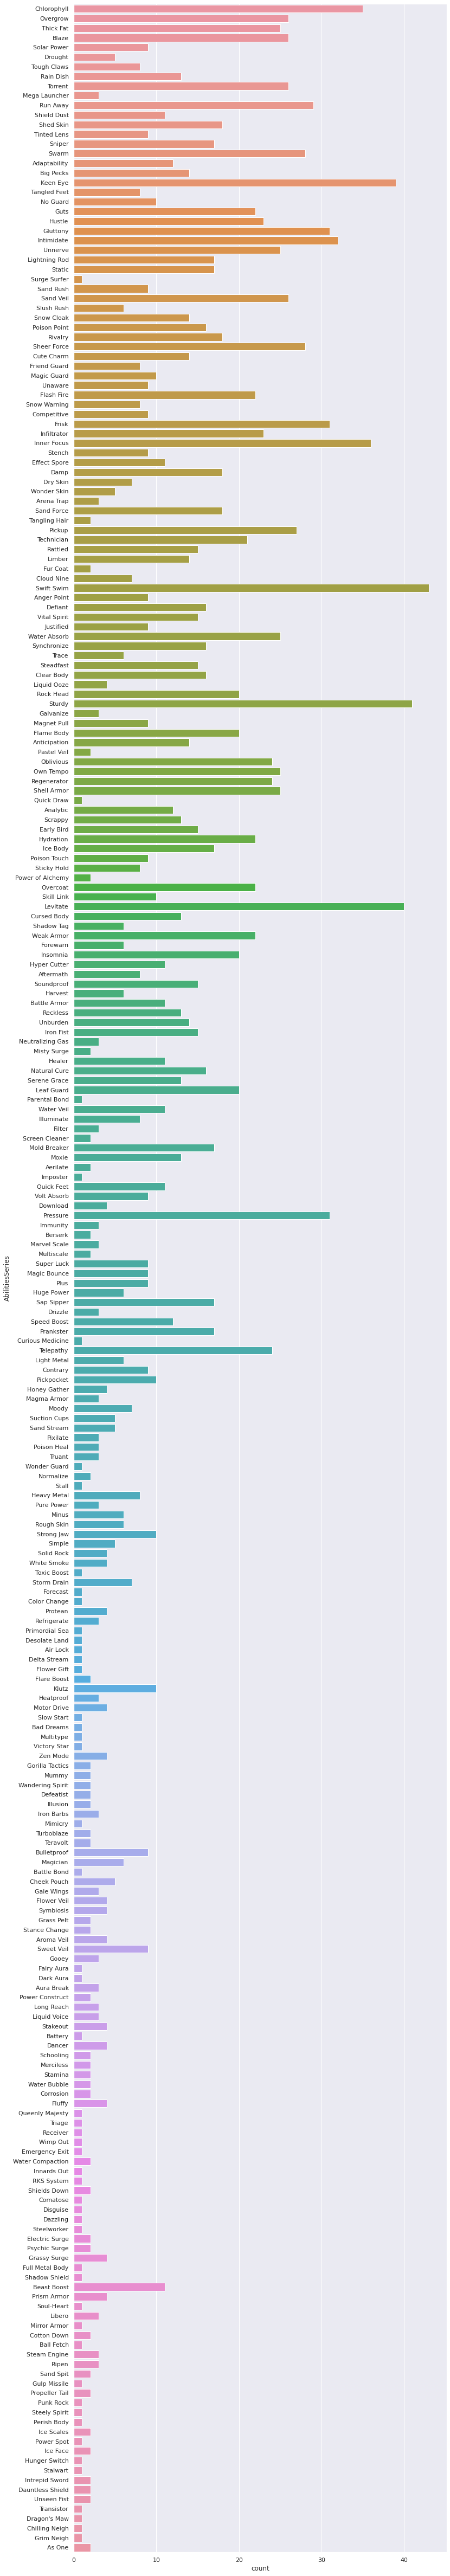

In [ ]:
# O resultado é um DataFrame com uma habilidade por linha. Assim fica fácil de fazer gráficos
# Aumentando a área de plotagem
sns.set(rc={'figure.figsize':(11.7,66.16)})

cx = sns.countplot(y=pokemons_abilities['AbilitiesSeries'])

### Filtrando Dados com .loc

Já aprendemos o modo básico de realizar filtros. Agora veremos outra maneira, que acrescenta algumas possibilidades ao processo de filtragem.

In [ ]:
# Por exemplo, o nosso DataFrame tem um índice númerico, portanto, podemos acessar diretamente por este índice.
pokemons_df.loc[10]

Number                                            8
Name                                      Wartortle
Type 1                                        Water
Type 2                                          NaN
Abilities                  ['Rain Dish', 'Torrent']
HP                                               59
Att                                              63
Def                                              80
Spa                                              65
Spd                                              80
Spe                                              58
BST                                             405
Mean                                           67.5
Standard Deviation                         9.142392
Generation                                      1.0
Experience type                         Medium Slow
Experience to level 100                     1059860
Final Evolution                                 0.0
Catch Rate                                       45
Legendary   

Podemos notar que ele traz todas as colunas correspondentes ao índice informado, no formato de uma Série.

In [ ]:
# Podemos trazer mais de uma linha também, utilizando a sintaxe de slicing do próprio Python com listas.

pokemons_df.loc[0:10]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,AbilitiesSeries
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,"[Chlorophyll, Overgrow]"
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,"[Chlorophyll, Overgrow]"
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,"[Chlorophyll, Overgrow]"
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,[Thick Fat]
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,"[Blaze, Solar Power]"
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7,"[Blaze, Solar Power]"
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3,"[Blaze, Solar Power]"
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8,[Drought]
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2,[Tough Claws]
9,7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,...,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0,"[Rain Dish, Torrent]"


é um DataFrame normal, com apenas as 10 linhas que selecionamos.



In [ ]:
# A seleção pode chegar ao nível de uma célula do DataFrame.
pokemons_df.loc[10, "Name"]  # primeiro item é o valor do indice, segundo o nome do Campo na linha do índice.

'Wartortle'

E, assim, como o processo de filtragem normal, podemos utilizar lógica booleana para fazer filtros.

In [ ]:
# Podemos utilizar logica booleana para selecionar linhas também

pokemons_df.loc[pokemons_df['Legendary'] == 1.0]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,AbilitiesSeries
182,144,Articuno,Ice,Flying,"['Pressure', 'Snow Cloak']",90,85,100,95,125,...,4.0,1.0,1.0,1.0,2.0,1.0,1.7,55.4,19.2,"[Pressure, Snow Cloak]"
183,144,Galarian Articuno,Psychic,Flying,['Competitive'],90,85,85,125,100,...,2.0,2.0,1.0,2.0,1.0,1.0,1.7,50.9,17.6,[Competitive]
184,145,Zapdos,Electric,Flying,"['Pressure', 'Static']",90,90,85,125,90,...,2.0,1.0,1.0,1.0,0.5,1.0,1.6,52.6,20.5,"[Pressure, Static]"
185,145,Galarian Zapdos,Fighting,Flying,['Defiant'],90,125,90,85,90,...,1.0,1.0,1.0,0.5,1.0,2.0,1.6,58.2,22.7,[Defiant]
186,146,Moltres,Fire,Flying,"['Flame Body', 'Pressure']",90,100,90,125,85,...,4.0,1.0,1.0,1.0,0.5,0.5,2.0,60.0,15.0,"[Flame Body, Pressure]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3,[Chilling Neigh]
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1,[Grim Neigh]
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4,[Unnerve]
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5,[As One]


In [ ]:
pokemons_df.loc[(pokemons_df['Legendary'] == 1.0) & (pokemons_df['Type 1'] == 'Ice')]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,AbilitiesSeries
182,144,Articuno,Ice,Flying,"['Pressure', 'Snow Cloak']",90,85,100,95,125,...,4.0,1.0,1.0,1.0,2.0,1.0,1.7,55.4,19.2,"[Pressure, Snow Cloak]"
448,378,Regice,Ice,NaN,"['Clear Body', 'Ice Body']",80,50,100,100,200,...,2.0,1.0,1.0,1.0,2.0,1.0,1.8,175.0,54.0,"[Clear Body, Ice Body]"
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3,[Chilling Neigh]


Mas, espere, isso não é tudo! A grande funcionalidade que a utilização do .loc permite é realizar alteração em várias linhas do DataFrame de uma maneira mais descomplicada.

Anteriormente, aprendemos que com a função apply, podíamos facilmente percorrer todas as linhas de um DataFrame e, através de uma função callback ou expressão lambda, fazer alterações nos valores. Em um DataFrame de 1032 linhas, isso é muito rápido. Mas e se tivermos 1 milhão de linhas ou mais?

Vamos ver a resposta!

In [ ]:
# Vamos olhar os valores únicos da coluna Type 2 do nosso DataFrame
type2 = pokemons_df['Type 2'].unique().tolist()
print(type2)

# Vamos ver quantas linhas não tem o campo preenchido?

type2_df = pokemons_df.groupby(['Type 2']).count().reset_index()

type2_ag = type2_df['Type 2'].tolist()
print(type2_ag)

print(len(type2))
print(len(type2_ag))

# O count é diferente porque a listagem original tem o valor nan, que se qualifica como nulo.
# Após o processo de agrupamento de dados, o nulo desaparece, nos deixando um item a menos.
# Se fizermos a soma de todas as linhas, também veremos que após o groupby, como as linhas onde 
# Type 2 era nulo não foram contadas, o total é de 548 pokemons apenas

# Portanto, se faz necessário tratar estes campos nulos.
# aprendemos utilizando o apply, mas com .loc, fica mais fácil.

pokemons_df.loc[pokemons_df['Type 2'].isnull(), ['Type 2']] = 'Não Definido'

type2_df = pokemons_df.groupby(['Type 2']).count().reset_index()

type2_ag = type2_df['Type 2'].tolist()
print(type2_ag)

print(len(type2))
print(len(type2_ag))


['Poison', 'Não Definido', 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel', 'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark', 'Ghost', 'Rock', 'Water', 'Fire', 'Bug']
['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Não Definido', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
19
19
['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Não Definido', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']
19
19


## Exercício

E para encerrar, é sua vez!!! Escreva um programa que faça os seguintes passos utilizando a biblioteca Pandas:
- Carregue o dataset de pokemons;
- filtre apenas os pokemons aquáticos, não-lendários;
- quebre o campo de habilidades em múltiplas linhas;
- selecione apenas as colunas nome, geração e habilidades;
- crie um novo dataframe que mostra a contagem de pokemons por habilidades;
- crie um novo dataframe que mostra a contagem de pokemons por geração.



In [ ]:
# Escreva seu código aqui


 # Encerrando

Espero que todos tenham aproveitado esta aula e que tenham aprendido bastante. Vamos deixar aqui alguns links que podem complementar os seus estudos e prepara-los para sua futura profissão!

Alguns destes links estarão escritos na lingua inglesa, mas você pode ativar a tradução automática no seu Google Chrome!!!

- Documentação Oficial
  - [Pandas](https://pandas.pydata.org/docs/)
  - [Seaborn](https://seaborn.pydata.org/)
  - [MatPlotLib](https://matplotlib.org/stable/index.html)
- Vídeos
  - [Saindo do Zero em Gráficos no Seaborn](https://www.youtube.com/watch?v=-hlzk4FXlUU)
  - [Tutorial Completo de Seaborn](https://www.youtube.com/watch?v=CWhFc5zjzWY)
  - [Pandas - Do Zero a Análise de Dados](https://www.youtube.com/watch?v=wnGsAOPKjLo)
  - [Introdução ao Pandas](https://www.youtube.com/watch?v=C0aj3FjN5e0)
- Artigos
  - [Tutorial Seaborn](https://acervolima.com/tutorial-python-seaborn/)
  - [Tutorial Estasite em Seaborn](https://estatsite.com.br/2020/07/31/graficos-no-seaborn-parte-1-e-2/)
  - [Tutorial MatplotLib](https://www.hashtagtreinamentos.com/saia-do-zero-em-graficos-python?gclid=Cj0KCQjwgO2XBhCaARIsANrW2X0yjydMamgqMk2xZYgPLqN-X3Wyp00DK7f_5AiBnrWYNCJJLHlp8pIaAizLEALw_wcB)
  - [How to use Pandas Power](https://medium.com/@nabiila-29/how-to-use-pandas-power-e58bfa4aa22)

  

<center>
<h1>Até a próxima aula!!!</h1>
</center>